#**Liner regression practical impletetion**

In [121]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D


In [122]:
#load the dataset
df=pd.read_csv('dm.csv')

In [123]:
# Check for missing values
print(df.isnull().sum())


carat      0
cut        0
color      0
clarity    0
price      0
L          0
W          0
H          0
dtype: int64


In [124]:
df.head(10)

,carat,cut,color,clarity,price,L,W,H
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,338,4.00,4.05,2.39


In [125]:
#l=length in mm
#w=width in mm
#h=depth in mm

In [126]:
# Extracting features (X=independent variable) and target variable (y)
x = df['L'].values
y = df['price'].values

In [127]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [128]:
# Adding a column of ones for the intercept term
x_train = np.vstack((np.ones_like(x_train), x_train)).T
x_test = np.vstack((np.ones_like(x_test), x_test)).T

In [129]:

# Function to perform linear regression
#WE ARE WRITING LINEAR REGRESSION ALGORITHM

def linear_regression(X, y, learning_rate, epochs):
    m, n = X.shape
    weights = np.zeros(n)  # Initialize weights with zeros
    cost_list = []
#gradient descent
    for _ in range(epochs):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = np.dot(X.T, error) / m
        weights -= learning_rate * gradient

        # Calculate the cost
        cost = (1/(2*m)) * np.sum(error**2)
        cost_list.append(cost)

    return weights, cost_list

In [130]:
# Train the model
learning_rate = 0.000001
epochs = 1000 # YOUR MODEL WILL GET PASS THROUGH THE DATASET 1000
weights, cost_list = linear_regression(x_train, y_train, learning_rate, epochs)
#learning rate is directly proportional to epochs

# Predict on the test set
y_pred_test = np.dot(x_test, weights)

# Calculate regression metrics

mse = np.mean((y_test - y_pred_test)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred_test))
total_variance = np.sum((y_test - np.mean(y_test))**2)
r_squared = 1 - (mse / total_variance)


In [131]:
# Print regression metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 134355.0107172832
Root Mean Squared Error (RMSE): 366.5446912960045
Mean Absolute Error (MAE): 365.68921577801774
R-squared: -20.373349249500198


In [132]:
# Create a DataFrame to display actual values, predicted values, and differences
results_df = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred_test,
    'Difference (Actual - Predicted)': y_test - y_pred_test
})

# Print the DataFrame
print(results_df)

   Actual Values  Predicted Values  Difference (Actual - Predicted)
0            344          6.835485                       337.164515
1            403          6.671796                       396.328204
2            403          6.850366                       396.149634
3            403          6.820604                       396.179396
4            351          6.656915                       344.343085
5            357          6.731319                       350.268681
6            355          6.270013                       348.729987
7            354          6.270013                       347.729987
8            402          6.374179                       395.625821
9            351          6.627153                       344.372847


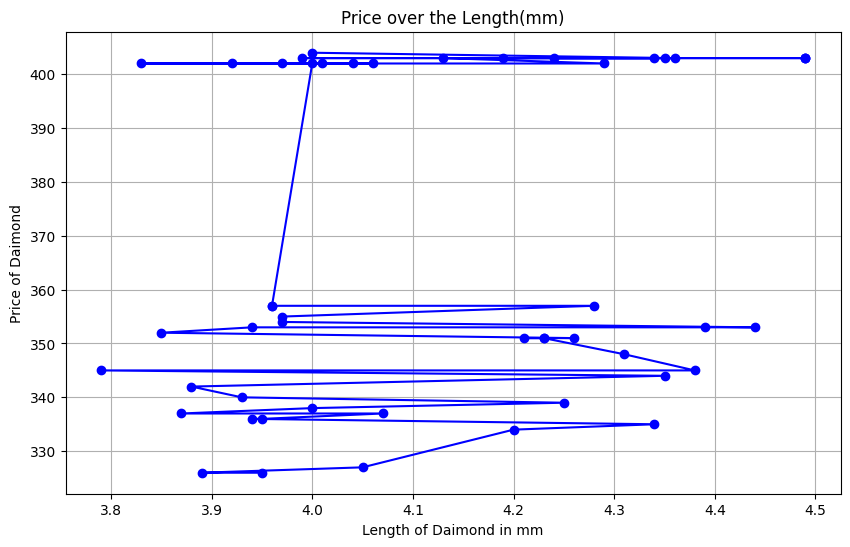

In [133]:

# Create a line chart

plt.figure(figsize=(10, 6))
plt.plot(df['L'], df['price'], marker='o', linestyle='-', color='blue')
plt.xlabel('Length of Daimond in mm')
plt.ylabel('Price of Daimond')
plt.title('Price over the Length(mm)')
plt.grid(True)

# Display the plot
plt.show()


In [134]:
# Train a linear regression model
#fit yout model
model=linear_model.LinearRegression()
#fit dependent and independent variable
model.fit(df[['L','W','H']],df['price'])

LinearRegression()

In [135]:
#store independent variable in x and dependent variable in y
x=df[['L','W','H']]
y=df[['price']]

In [136]:

#split data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [137]:
model.fit(x_train,y_train)

LinearRegression()

In [138]:
#check model score =coefficient of determination. range between 0-1
model.score(x_train,y_train)

0.11157826518226

In [157]:
model.predict([[3.80,3.85,2.35]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[369.74989243]])